In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

# 1. Read the data

In [2]:
# read in the data and check the first 5 rows
df = pd.read_csv(r'C:\Users\Dell\Downloads\data.csv', index_col=0)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

the last cloumn, Unnamed:32 has bunch of missing values.

# 2. Missing values


In [3]:
# checking of null values
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

# 3. Reassign target and drop the null values

In [5]:
# Drop useless variables
data = df.drop(['Unnamed: 32'],axis = 1)

# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [6]:
# check the data type of each column
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Exploratory Data Analysis(EDA)

In [7]:
#describe
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



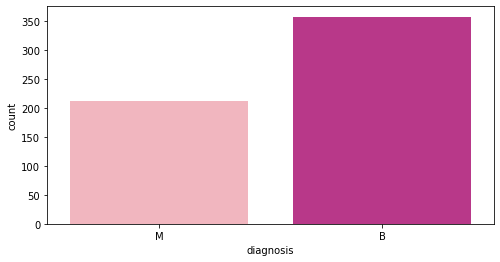

In [8]:
# visualize distributation of classes 
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(data['diagnosis'], palette='RdPu')

# count number of obvs in each class
benign, malignant = data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(data) * 100, 2), '%')

In [9]:
pie1 = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['blue', 'yellow'], 
                           line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [pie1], layout=layout)
py.iplot(fig)

here out of 569 observations, 357 (or 62.7%) have been labeled benign, while the rest 212 (or 37.3%) have been labeled malignant


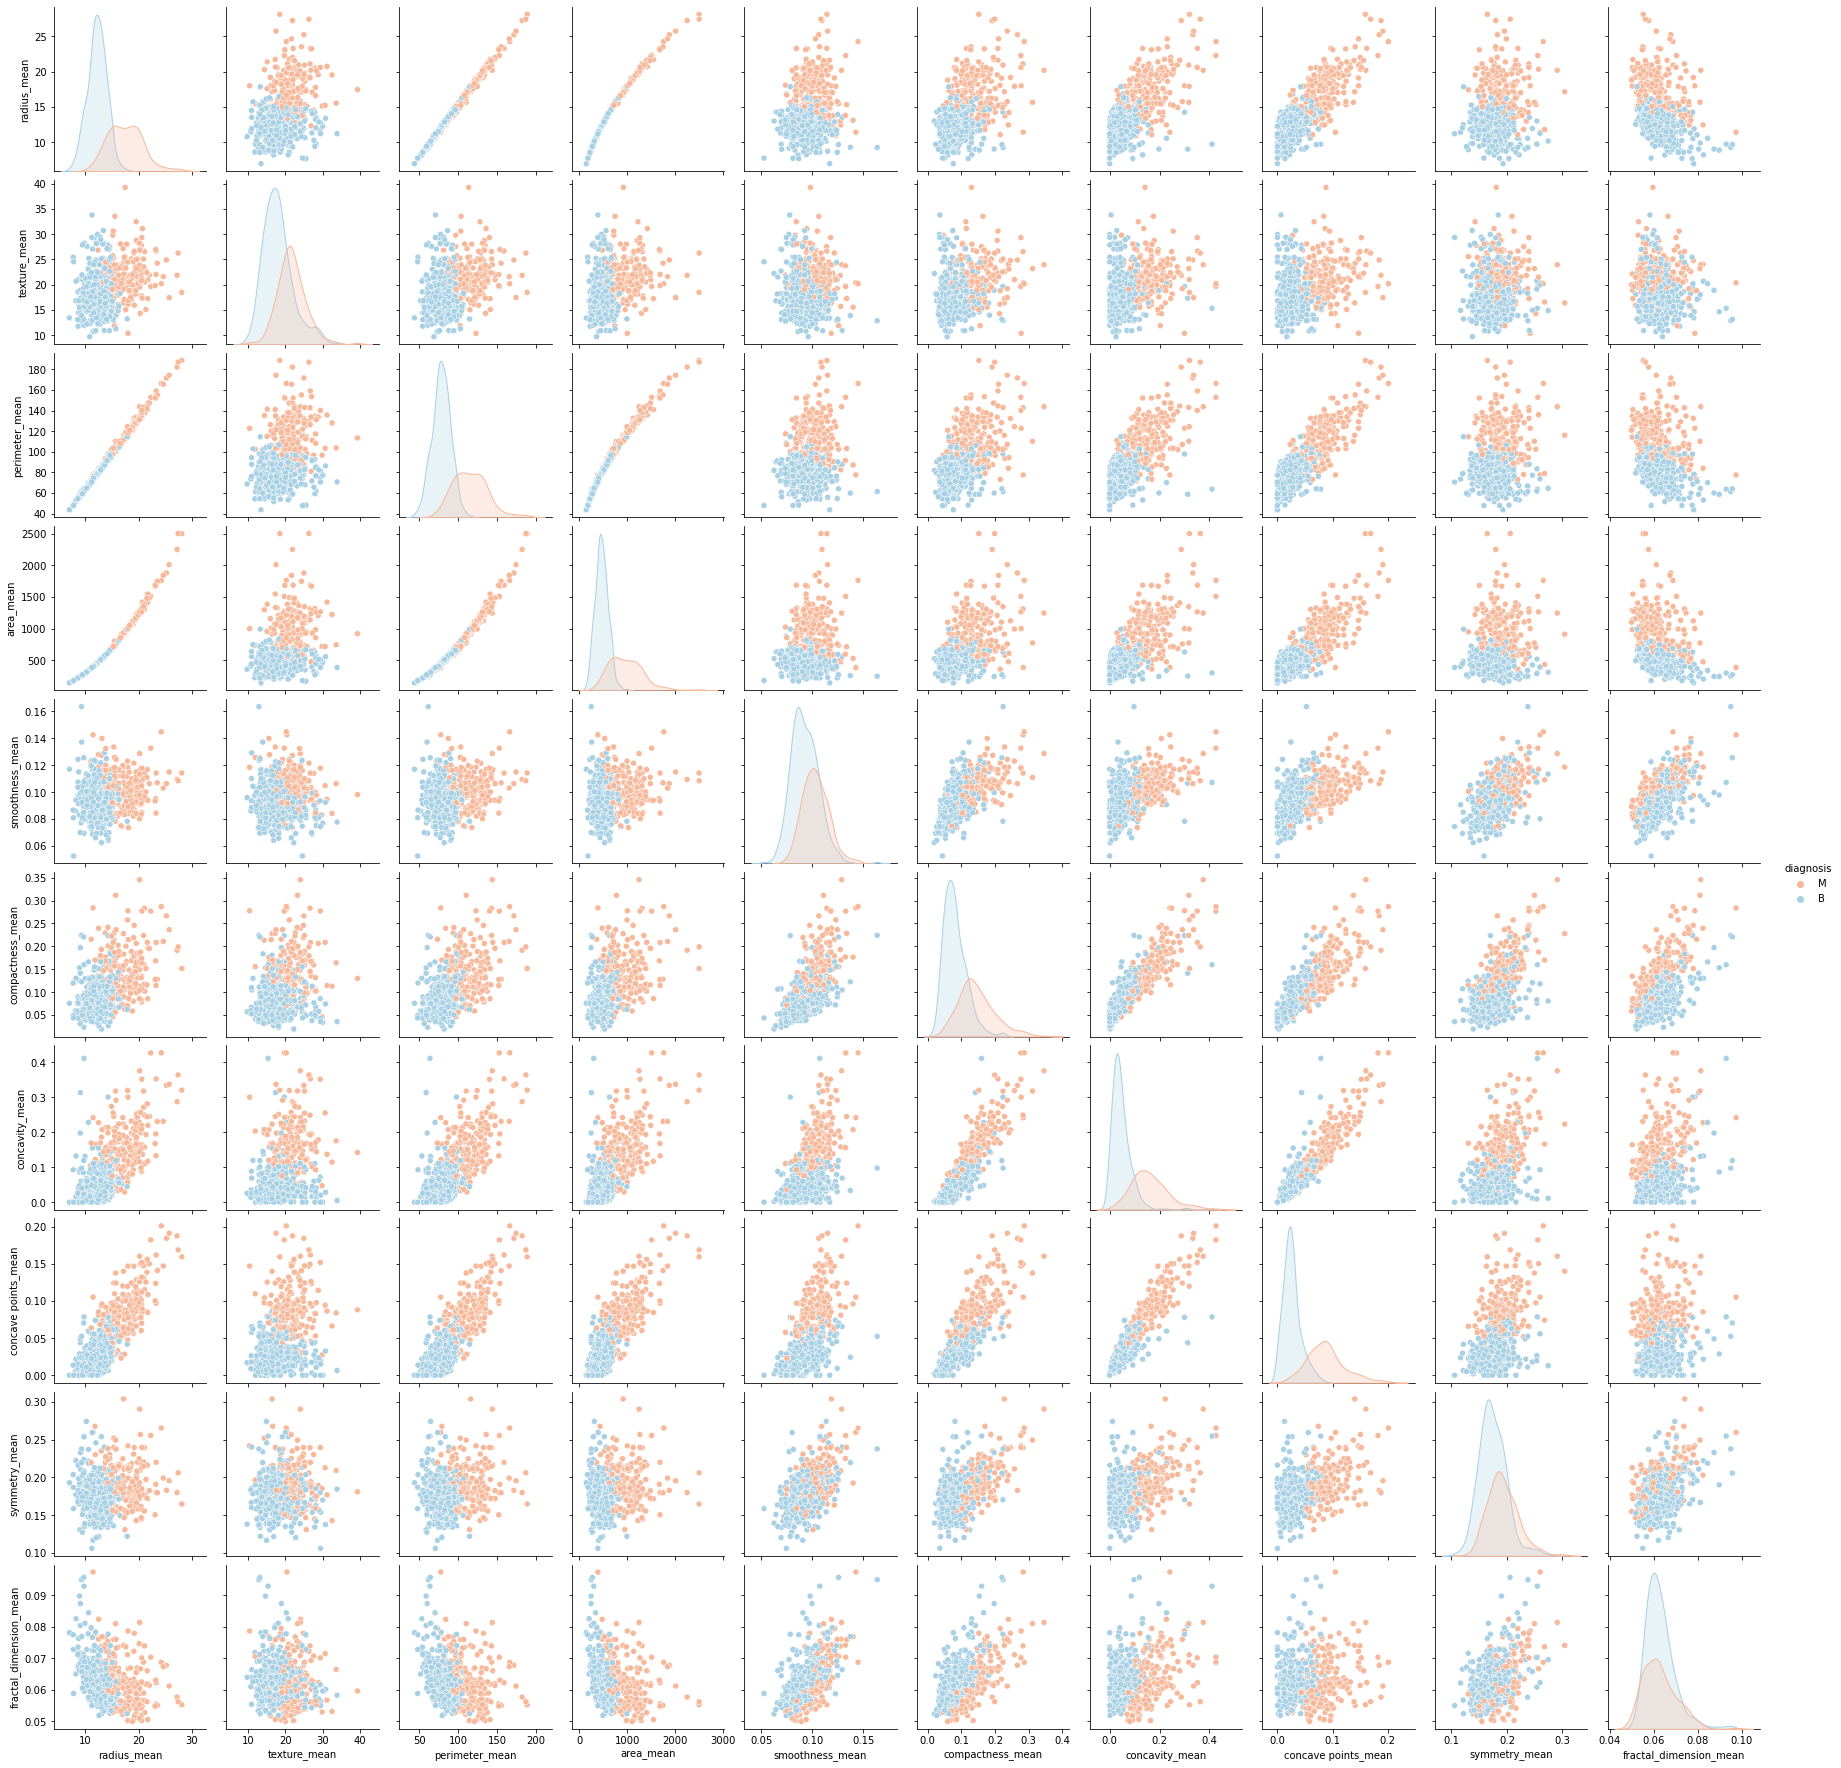

In [10]:
#generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=data[cols], hue='diagnosis', palette='RdBu')

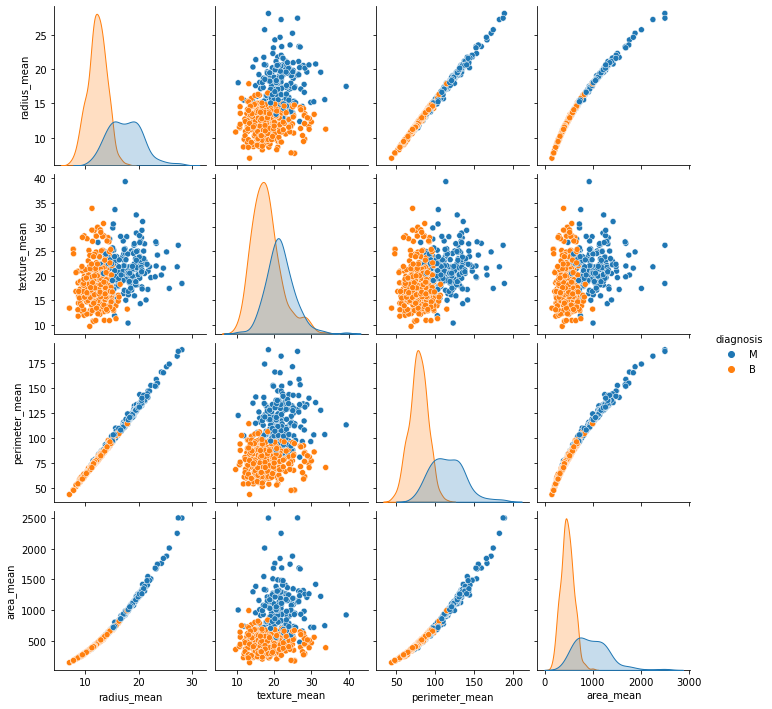

In [11]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

there are linear pattern between the radius, perimeter and area attributes concavity,concave_oints and compactness these may possibly imply multicollinearity

In [12]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
corr = data.corr().round(2)

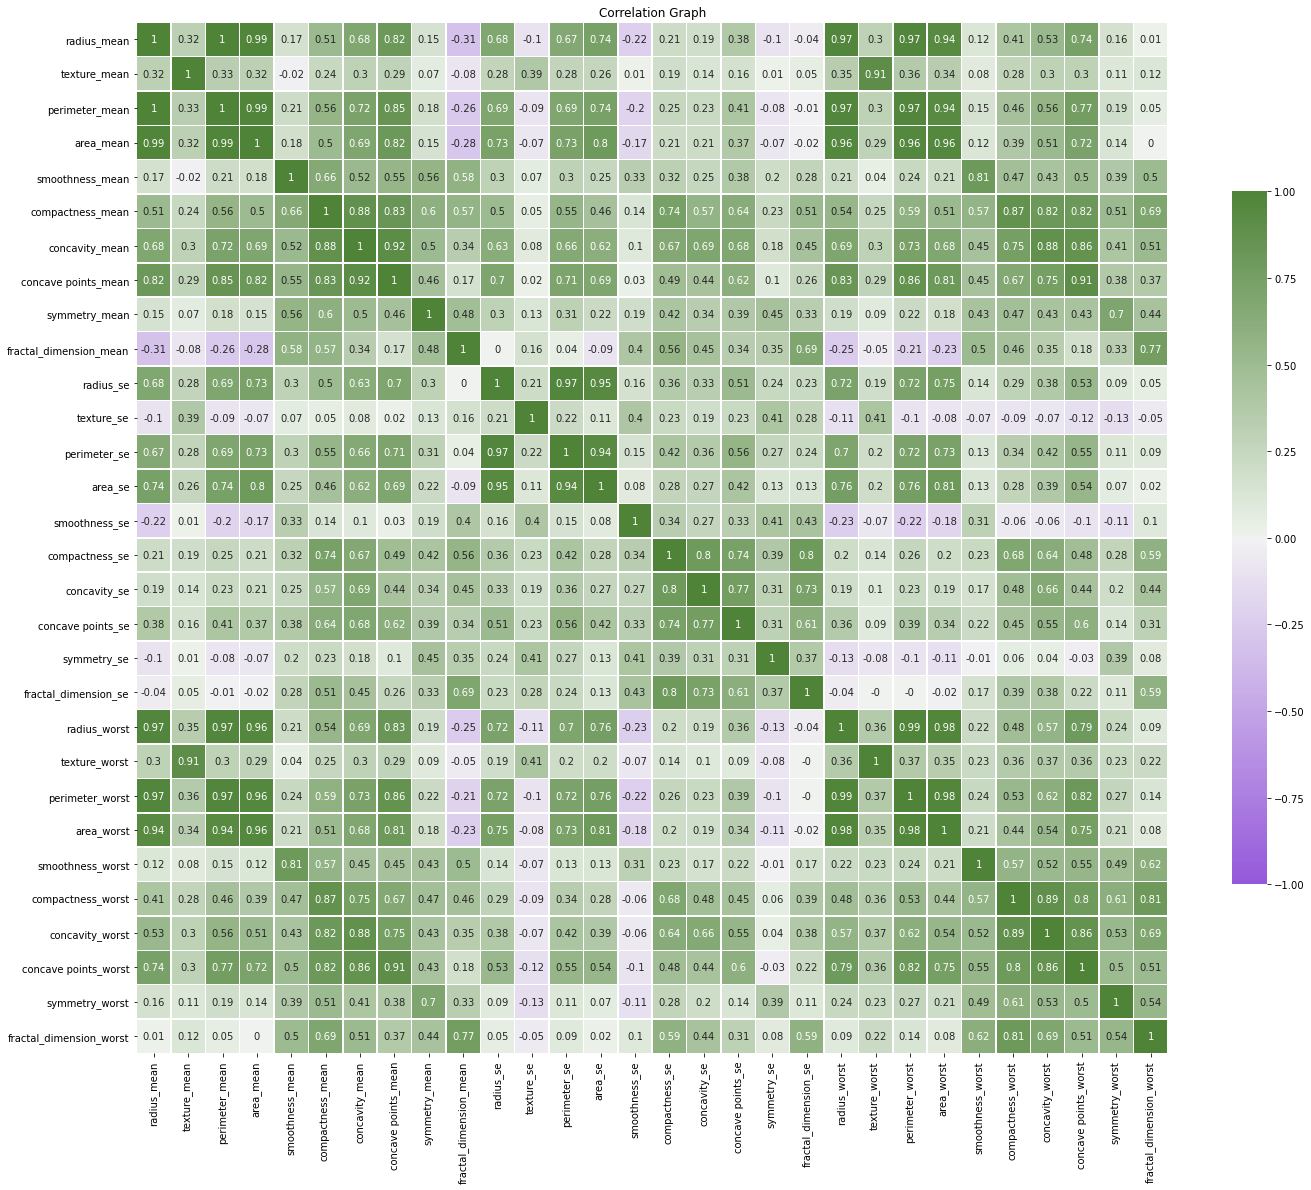

In [13]:
plt.figure(figsize=(20, 20))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

The presence of multicollinearity between some of our variables. For instance, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.

Multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column

# Positively correlated 

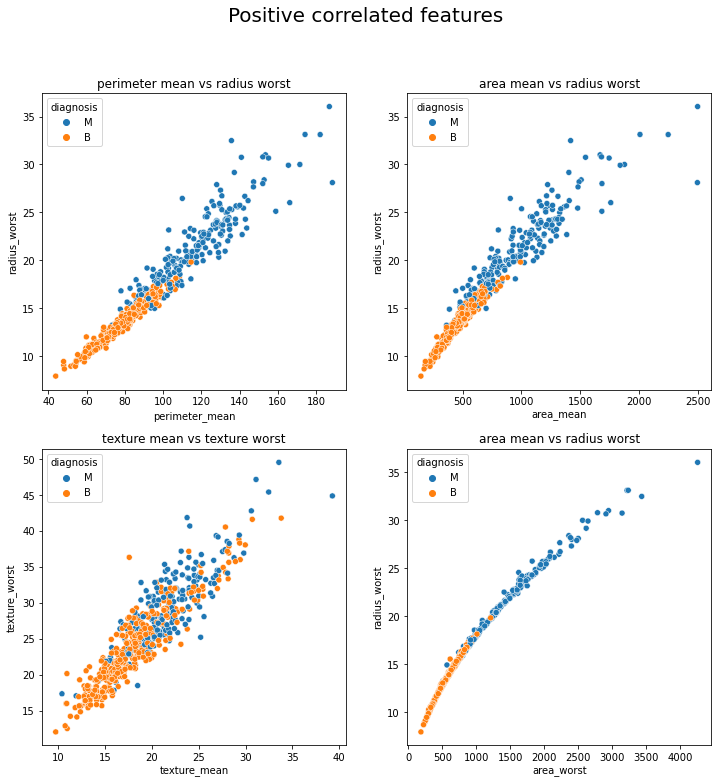

In [14]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

# Negative correlated features

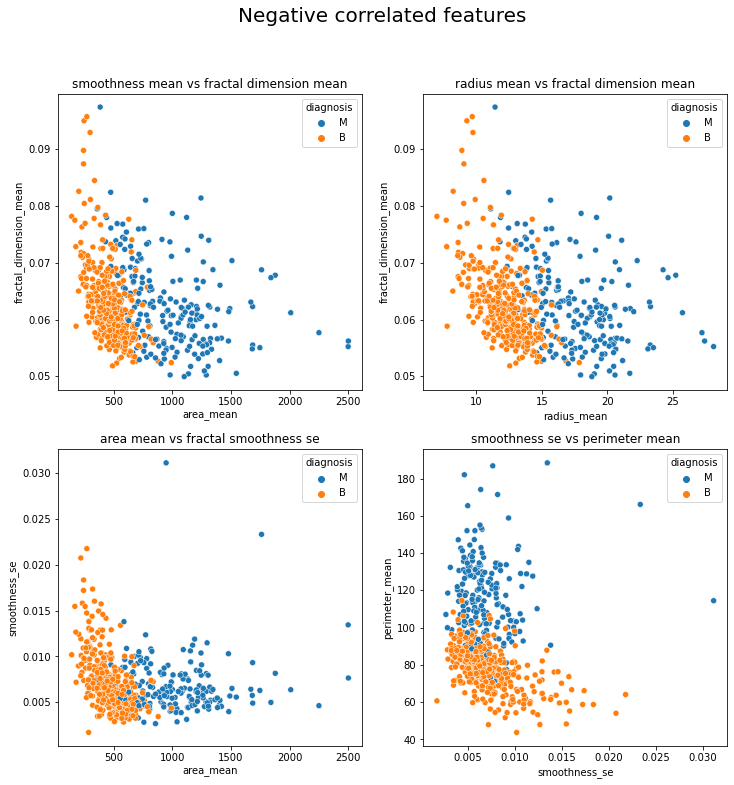

In [15]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# Uncorrelated features 

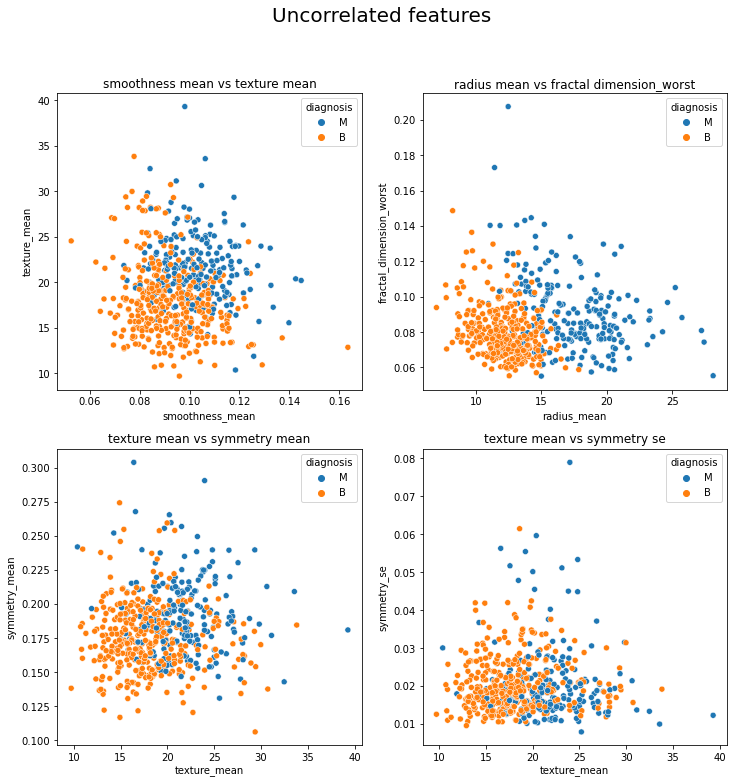

In [16]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. We should discard the "worst" columns from our analysis and only focus on the "mean" columns

In [17]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
data = data.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
data = data.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
data = data.drop(cols, axis=1)

# verify remaining columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

# Model

In [18]:
X = data.drop('diagnosis',axis=1).values
y = data['diagnosis'].values

In [19]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [20]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [21]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 12), (455,), (114, 12), (114,))

In [39]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X1 = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))  

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

Accuracy                   Algorithm
0  0.956140                         SVC
1  0.868421      DecisionTreeClassifier
2  0.956140          LogisticRegression
3  0.912281        KNeighborsClassifier
4  0.938596      RandomForestClassifier
5  0.947368  GradientBoostingClassifier
6  0.947368                         XGB

# Here Logistic regression and SVC have good accuracy so now we will check using confusion matrix and recall value for the same

Confusion matrix

true positive (TP) : Malignant tumour correctly identified as malignant

true negative (TN) : Benign tumour correctly identified as benign

false positive (FP) : Benign tumour incorrectly identified as malignant

false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :

Accuracy : (TP +TN) / (TP + TN + FP +FN)

Precision : TP / (TP + FP)

Recall : TP / (TP + FN)

In [41]:

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, y_train)

# We predict target values
y_predict1 = logreg.predict(X_test)

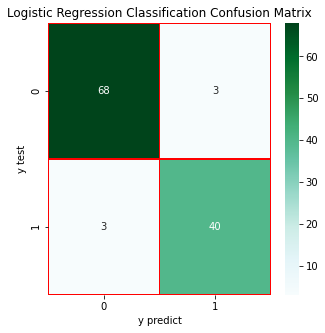

In [26]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuGn")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [27]:
# Test score
score_logreg = logreg.score(X_test, y_test)
print(score_logreg)

0.9473684210526315


In [28]:
# recall
recall_score(y_test,y_predict1, average='macro')

0.9439895185063871

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

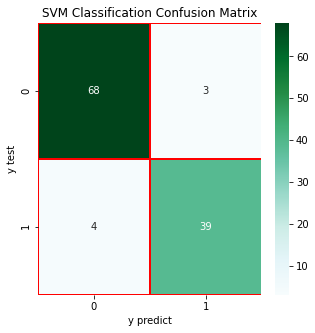

In [30]:
# The confusion matrix
svmcla_cm = confusion_matrix(y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuGn")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [31]:
# Test score
score_svmcla = svmcla.score(X_test, y_test)
print(score_svmcla)

0.9385964912280702


In [32]:
#recall
recall_score(y_test,Y_predict2, average='macro')

0.9323616115296429

In [43]:
# Pick the model
model = SVC()


# Tunning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)



 Best Score is 
0.9295169082125605

 Best Estinator is 
SVC(C=1, kernel='linear')

 Best Parametes are
{'C': 1, 'kernel': 'linear'}


Observation:
Using this Algorithm, we can see that

Linear regression gives slight better score

Showing the Best Estimator Parametes for final model

# Deploy Model

In [44]:
X

['SVC',
 'DecisionTreeClassifier',
 'LogisticRegression',
 'KNeighborsClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'XGB']

In [35]:
import pickle as pkl

In [36]:
# Trainned Model # You can also use your own trainned model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [37]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, y_test)

In [47]:
loaded_model.predict([[4,3,0,2,0,1,1,1,2,3,5,12]])

array(['M'], dtype=object)